In [27]:
import numpy as np
import glob
from matplotlib import pyplot as plt
import seaborn as sns
import os
import pandas as pd

In [49]:
files_sfs = glob.glob('../subsampling/results/results_tsv/*sfs*')
files_sumstats = glob.glob('../subsampling/results/results_tsv/*sumstats*')
files_mean_freqs_pos = glob.glob('../subsampling/results/results_tsv/*mean_freqs_pos*')

In [50]:
files_sumstats

['../subsampling/results/results_tsv/Uniform_Centers.Birmingham_sumstats.tsv',
 '../subsampling/results/results_tsv/Uniform_Centers.Bury_sumstats.tsv',
 '../subsampling/results/results_tsv/Uniform_Centers.Stoke_sumstats.tsv',
 '../subsampling/results/results_tsv/Uniform_Centers.Oxford_sumstats.tsv',
 '../subsampling/results/results_tsv/Uniform_Centers.Bristol_sumstats.tsv',
 '../subsampling/results/results_tsv/Uniform_Centers.Reading_sumstats.tsv',
 '../subsampling/results/results_tsv/Uniform_Countries.Wales_sumstats.tsv',
 '../subsampling/results/results_tsv/Uniform_Centers.Sheffield_sumstats.tsv',
 '../subsampling/results/results_tsv/Uniform_Centers.Barts_sumstats.tsv',
 '../subsampling/results/results_tsv/Uniform_Centers.Cardiff_sumstats.tsv',
 '../subsampling/results/results_tsv/Uniform_Centers.Middlesborough_sumstats.tsv',
 '../subsampling/results/results_tsv/Uniform_Centers.Hounslow_sumstats.tsv',
 '../subsampling/results/results_tsv/Uniform_Centers.Croydon_sumstats.tsv',
 '../su

In [19]:
pairs = []
for file_path in files_sfs:
    name = os.path.basename(file_path)
    parts = name.split('_')
    # Take the first two strings
    first_two = '_'.join(parts[:2])
    # Split the second string by dot
    second_string_parts = first_two.split('.')
    # Truncate the second string by underscore
    truncated_second_string = second_string_parts[1].split('_')[0]
    # Combine the first string and truncated second string with dot
    final_result = [second_string_parts[0],truncated_second_string]
    pairs.append(final_result)
pairs

[['Uniform_Centers', 'Bury'],
 ['Uniform_Centers', 'Middlesborough'],
 ['Uniform_Countries', 'Scotland'],
 ['Uniform_Centers', 'Sheffield'],
 ['Uniform_Centers', 'Bristol'],
 ['Uniform_Centers', 'Edinburgh'],
 ['Uniform_Centers', 'Newcastle'],
 ['Uniform_Centers', 'Hounslow'],
 ['Uniform_Centers', 'Barts'],
 ['Uniform_Centers', 'Leeds'],
 ['Uniform_Centers', 'Croydon'],
 ['Uniform_Centers', 'Birmingham'],
 ['Uniform_Centers', 'Cardiff'],
 ['Uniform_Centers', 'Liverpool'],
 ['Uniform_Centers', 'Nottingham'],
 ['Uniform_Centers', 'Manchester'],
 ['Uniform_Centers', 'Oxford'],
 ['Uniform_Countries', 'Wales'],
 ['Uniform_Centers', 'Stoke'],
 ['Uniform_Centers', 'Glasgow'],
 ['Uniform_Centers', 'Reading'],
 ['Uniform_Countries', 'England']]

In [ ]:
### NOTE IN FUTURE NEED TO ADD AVERAGING OVER SEEDS FOR SFS, ADD ERROR BARS TO BARPLOTS

<ipython-input-47-cfbc5a2c2946>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2, 2, figsize=(8, 8))


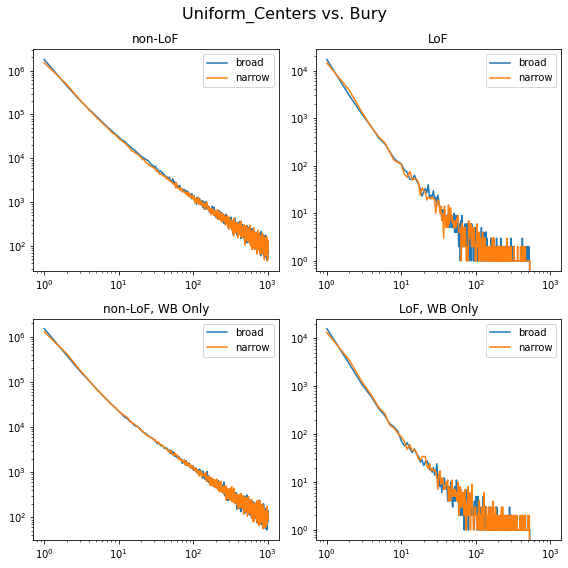

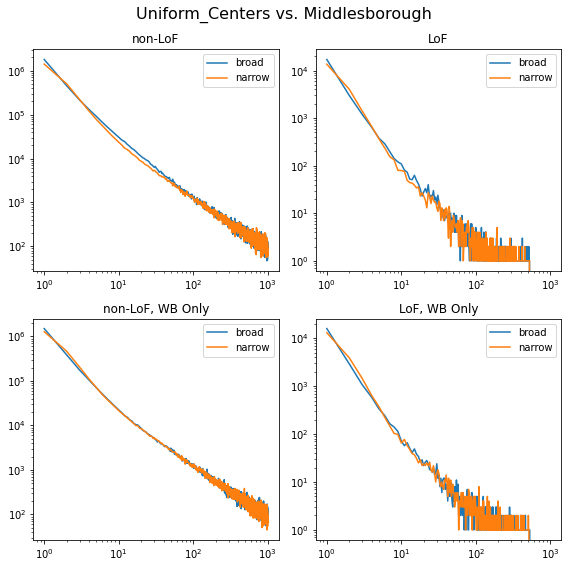

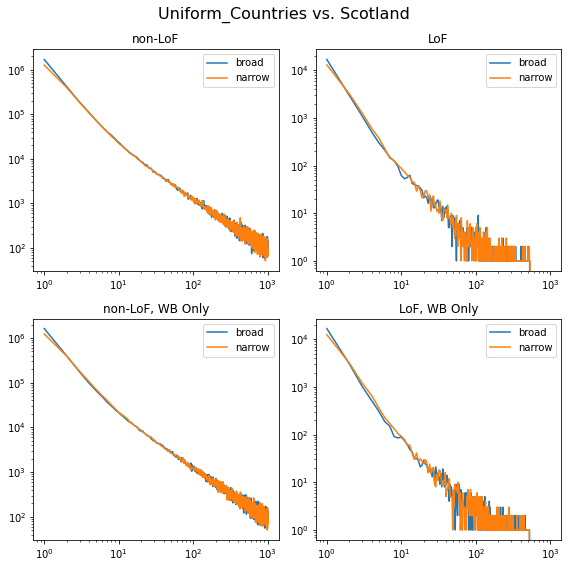

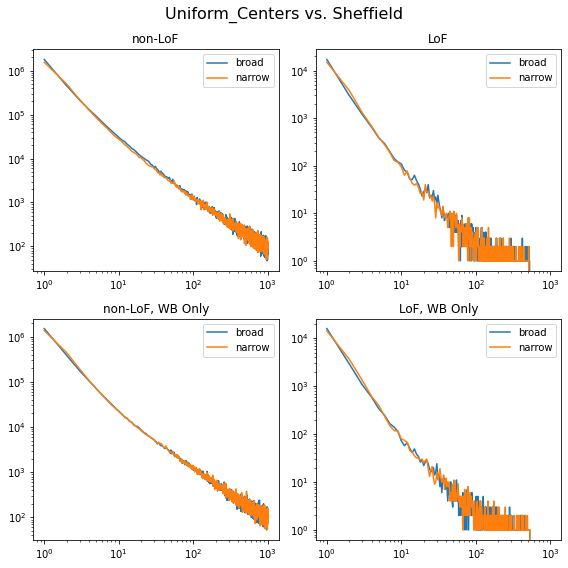

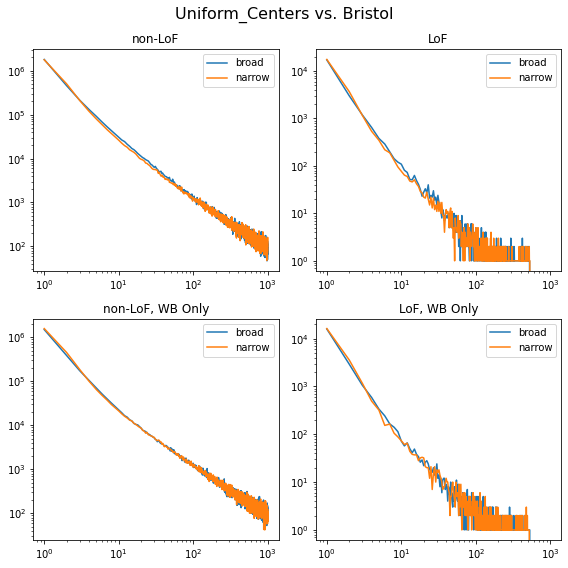

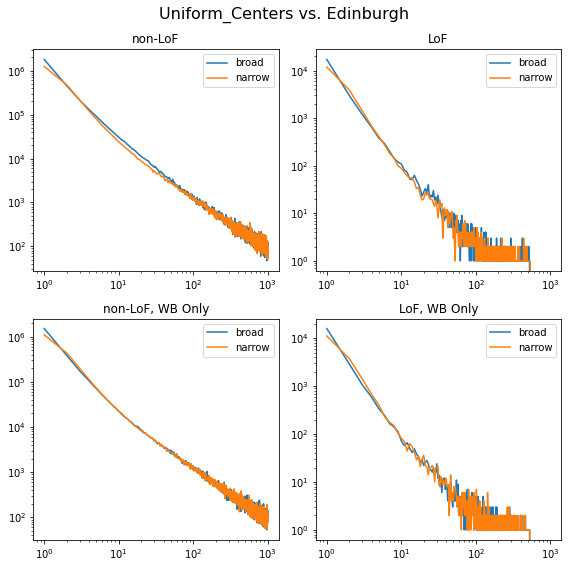

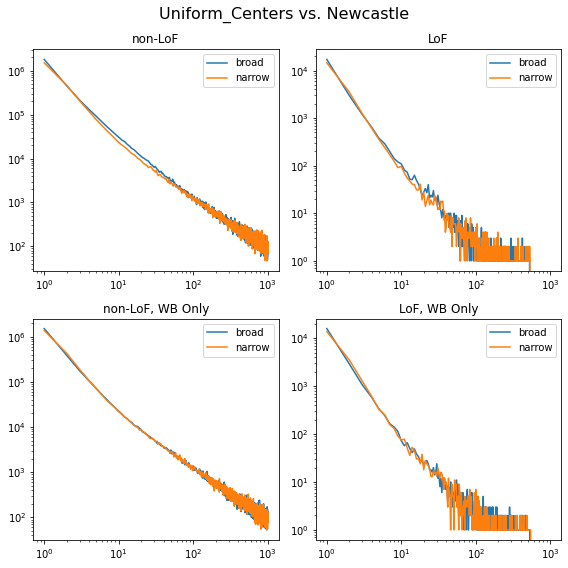

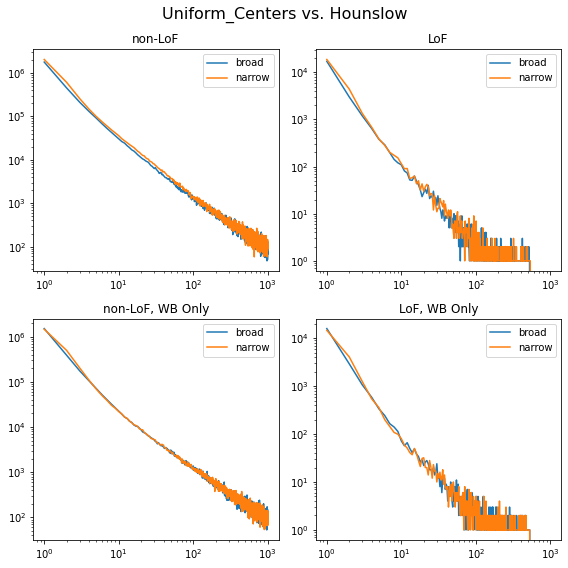

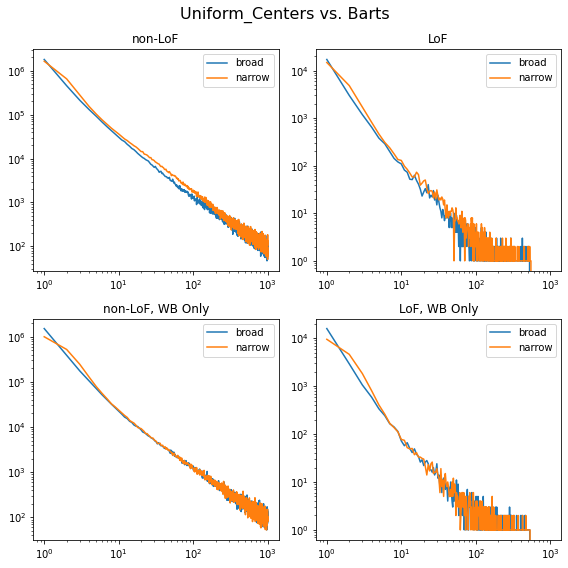

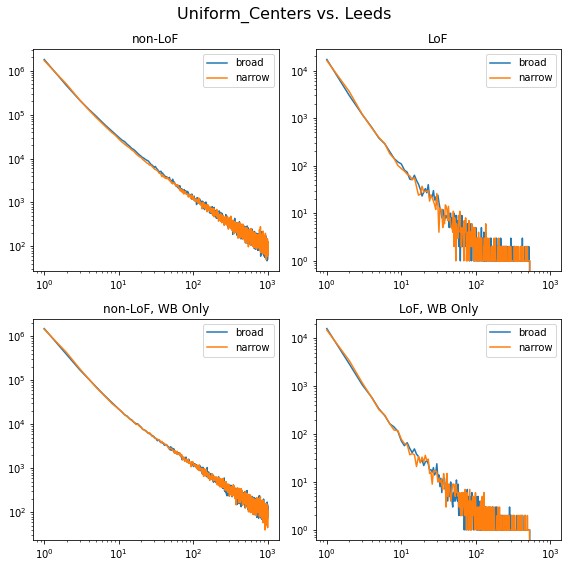

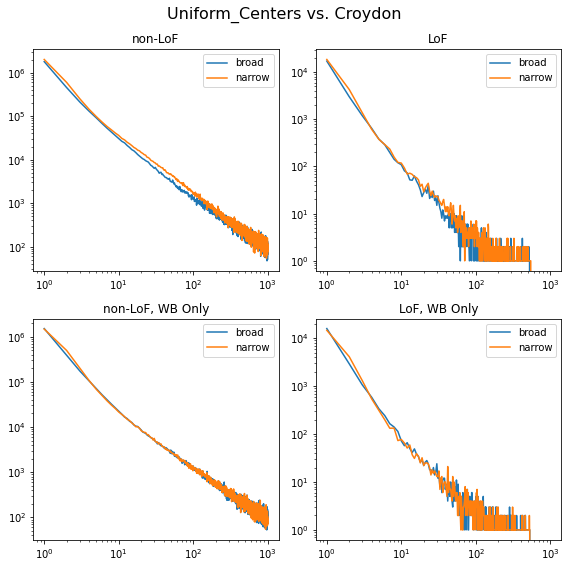

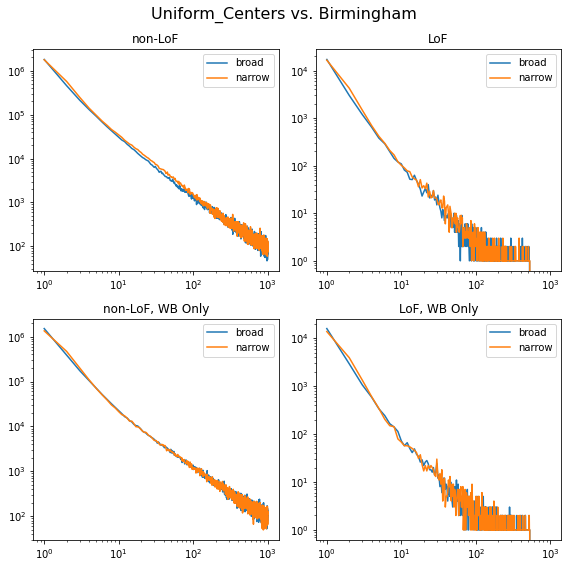

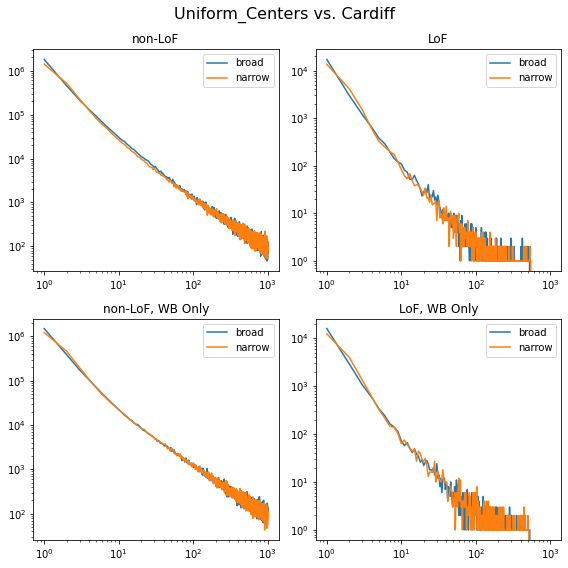

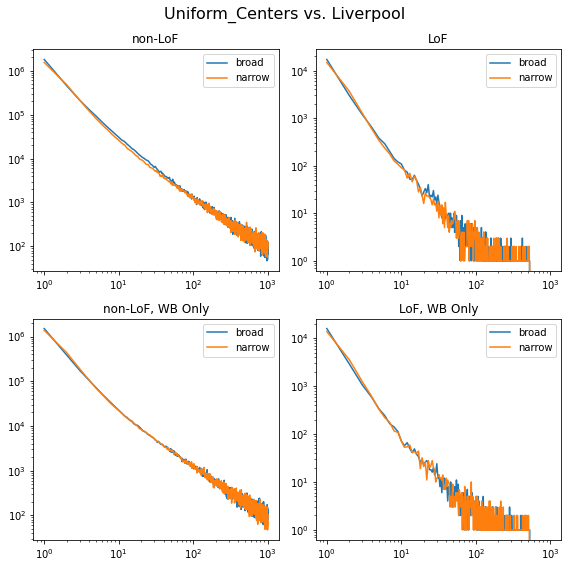

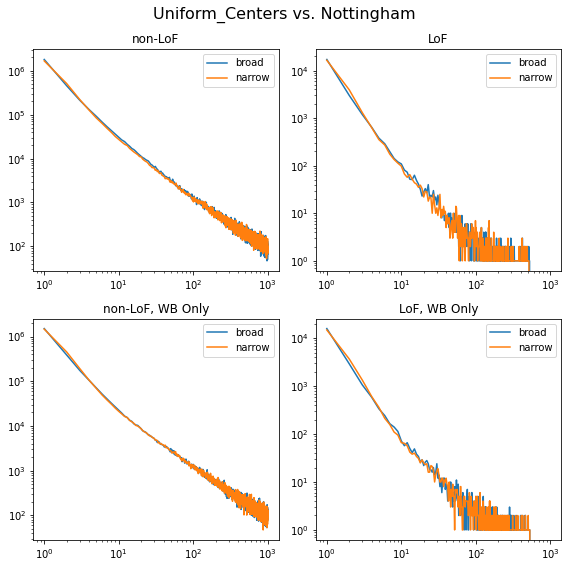

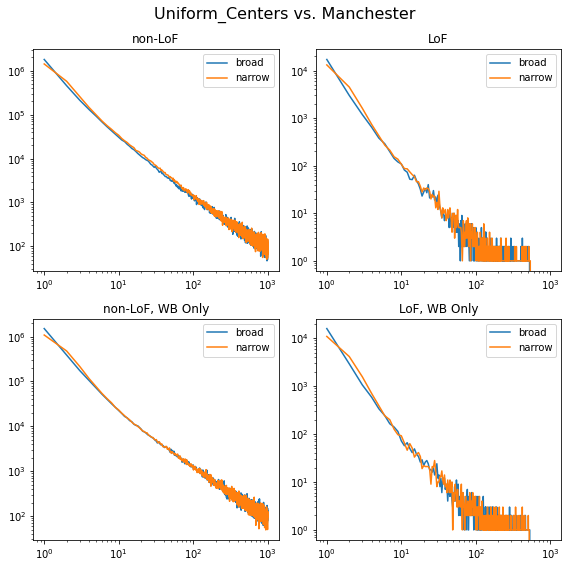

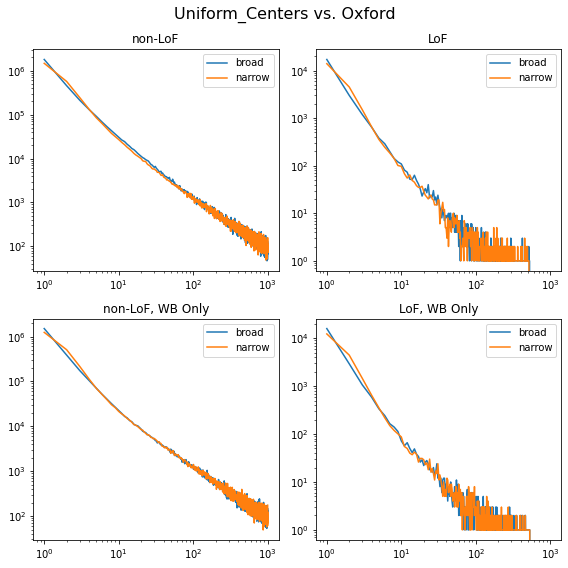

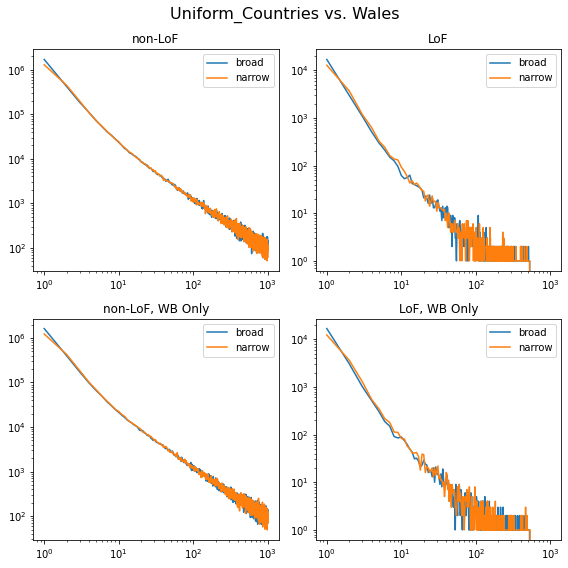

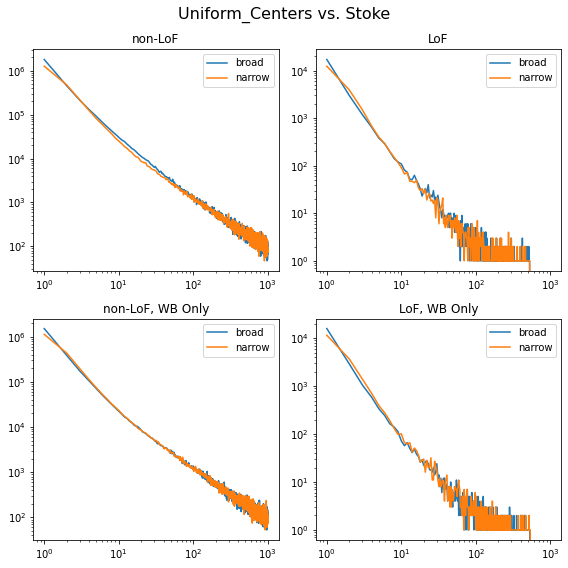

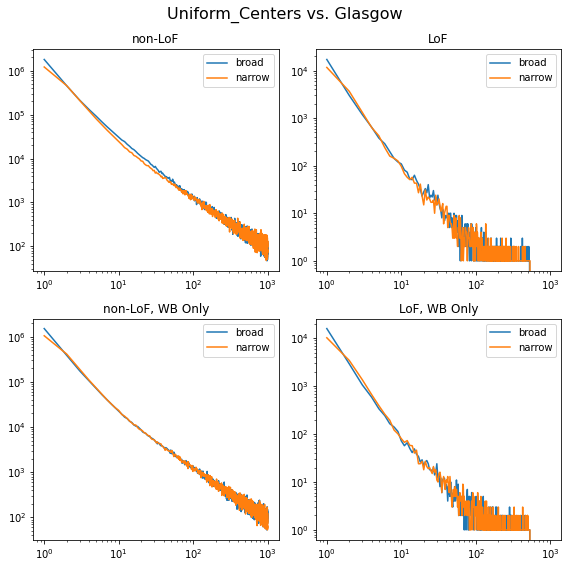

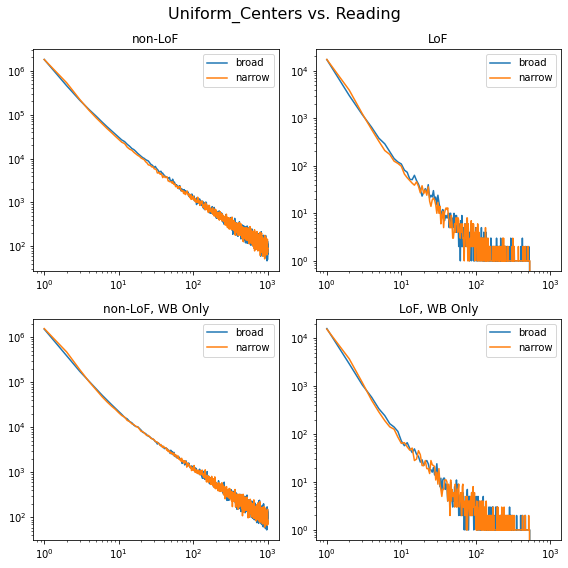

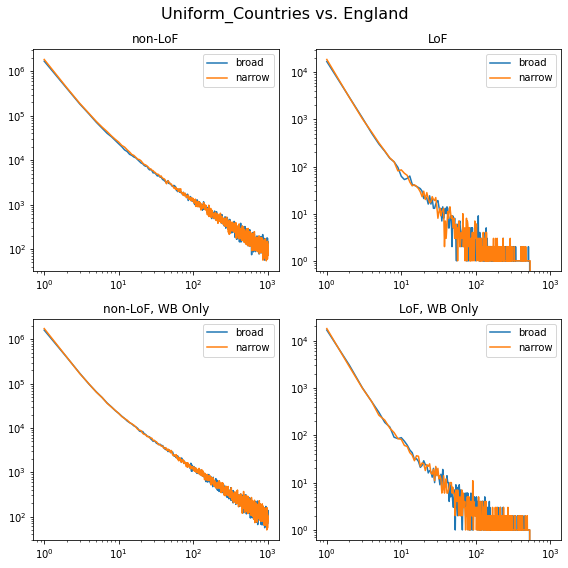

In [47]:
for pair in pairs:
    broad = pair[0]
    narrow = pair[1]
    
    sfs_file = pd.read_csv([f for f in files_sfs if broad in f and narrow in f][0],sep='\t')
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

    #counts_Uniform_Centers_nonLoF_seed0_WBonlyTrue
    axs[0,0].loglog(sfs_file['counts'][1:],sfs_file['counts_'+broad+'_nonLoF_seed0_WBonlyFalse'][1:],label="broad")
    axs[0,0].loglog(sfs_file['counts'][1:],sfs_file['counts_'+narrow+'_nonLoF_seed0_WBonlyFalse'][1:],label="narrow")
    axs[0,0].set_title("non-LoF")
    axs[0,0].legend()
    
    axs[0,1].loglog(sfs_file['counts'][1:],sfs_file['counts_'+broad+'_LoF_seed0_WBonlyFalse'][1:],label="broad")
    axs[0,1].loglog(sfs_file['counts'][1:],sfs_file['counts_'+narrow+'_LoF_seed0_WBonlyFalse'][1:],label="narrow")
    axs[0,1].set_title("LoF")
    axs[0,1].legend()
    
    axs[1,0].loglog(sfs_file['counts'][1:],sfs_file['counts_'+broad+'_nonLoF_seed0_WBonlyTrue'][1:],label="broad")
    axs[1,0].loglog(sfs_file['counts'][1:],sfs_file['counts_'+narrow+'_nonLoF_seed0_WBonlyTrue'][1:],label="narrow")
    axs[1,0].set_title("non-LoF, WB Only")
    axs[1,0].legend()
    
    axs[1,1].loglog(sfs_file['counts'][1:],sfs_file['counts_'+broad+'_LoF_seed0_WBonlyTrue'][1:],label="broad")
    axs[1,1].loglog(sfs_file['counts'][1:],sfs_file['counts_'+narrow+'_LoF_seed0_WBonlyTrue'][1:],label="narrow")
    axs[1,1].set_title("LoF, WB Only")
    axs[1,1].legend()
    
    fig.suptitle(broad+' vs. '+narrow, fontsize=16)
    plt.tight_layout()
    plt.savefig('../figures/subsampling/sfs/'+broad+'.'+narrow+'.pdf')
    


<ipython-input-122-2c78d89fbb45>:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles, loc='lower center', ncol=3, labels=[broad,narrow])
<ipython-input-122-2c78d89fbb45>:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles, loc='lower center', ncol=3, labels=[broad,narrow])
<ipython-input-122-2c78d89fbb45>:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles, loc='lower center', ncol=3, labels=[broad,narrow])
<ipython-input-122-2c78d89fbb45>:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles, loc='lower center', ncol=3, labels=[broad,narrow])
<ipython-input-122-2c78d89fbb45>:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles, loc='lower center', ncol=3, labels=[broad,narr

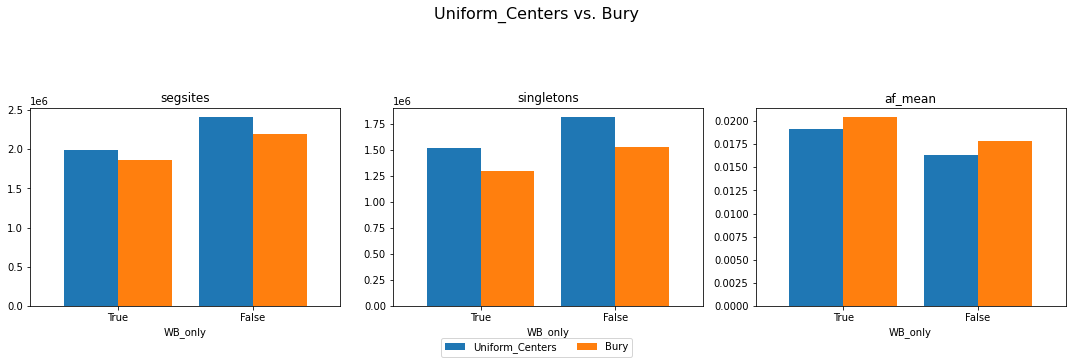

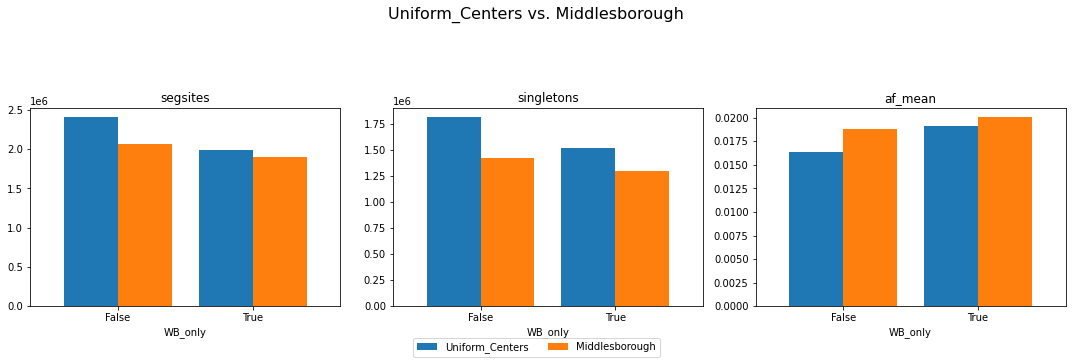

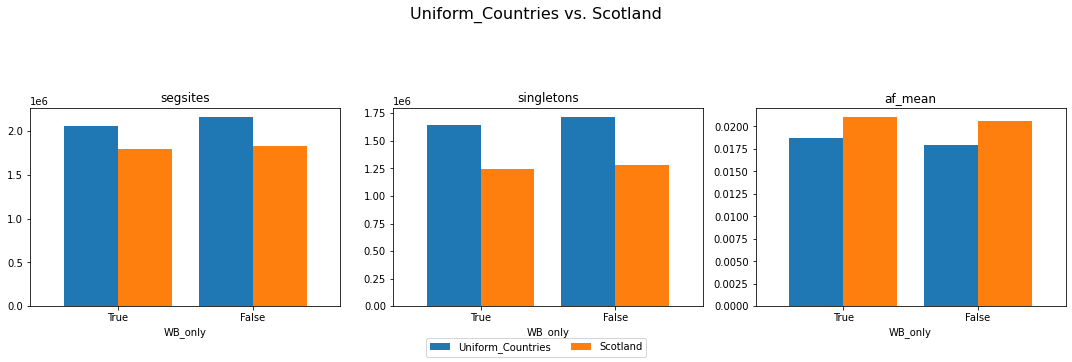

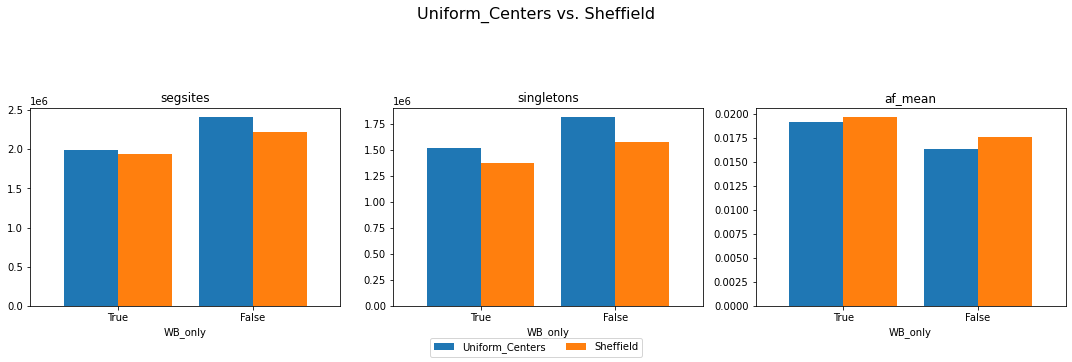

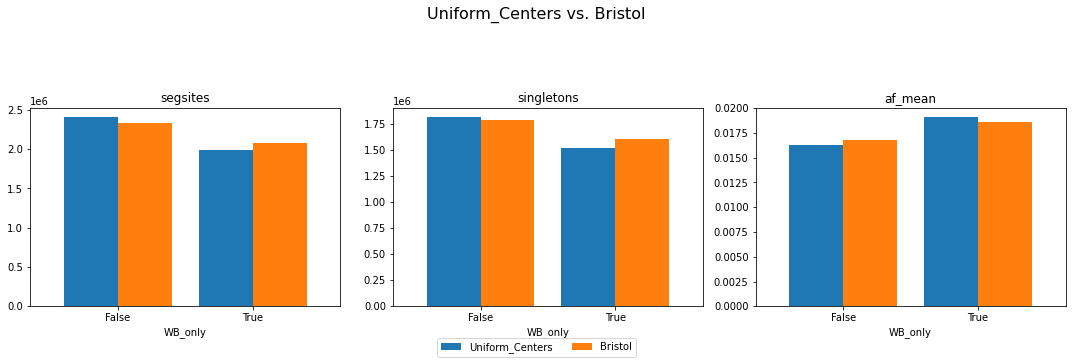

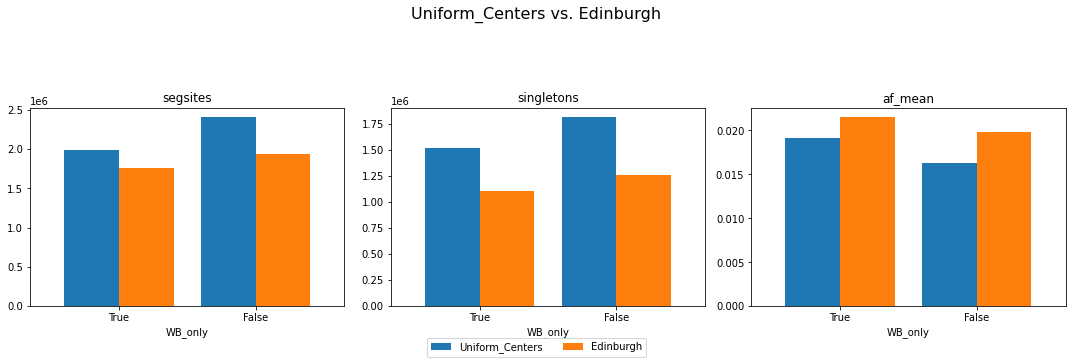

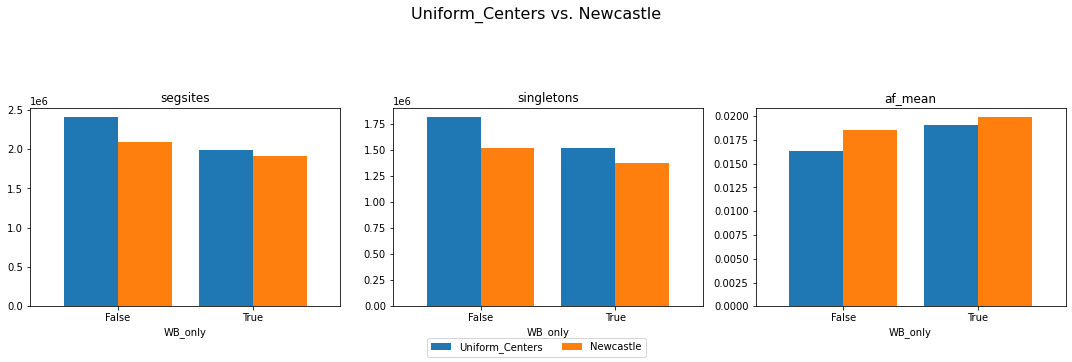

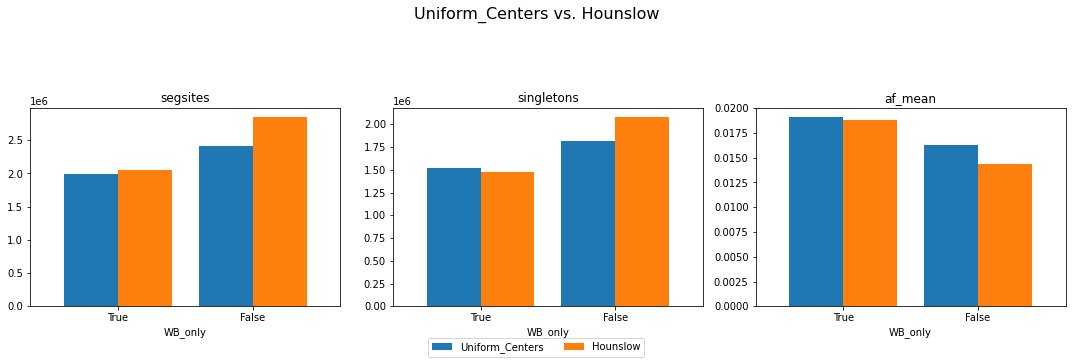

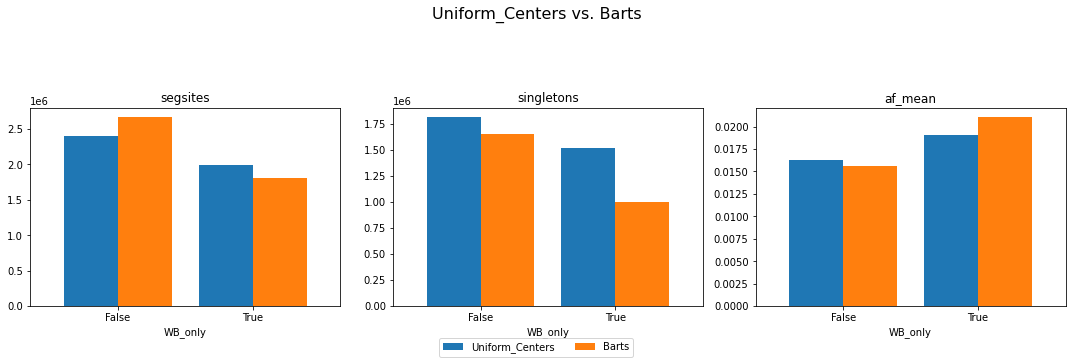

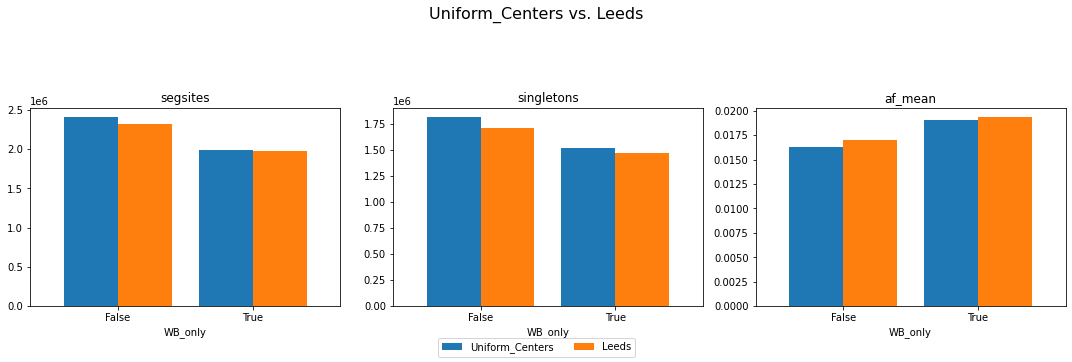

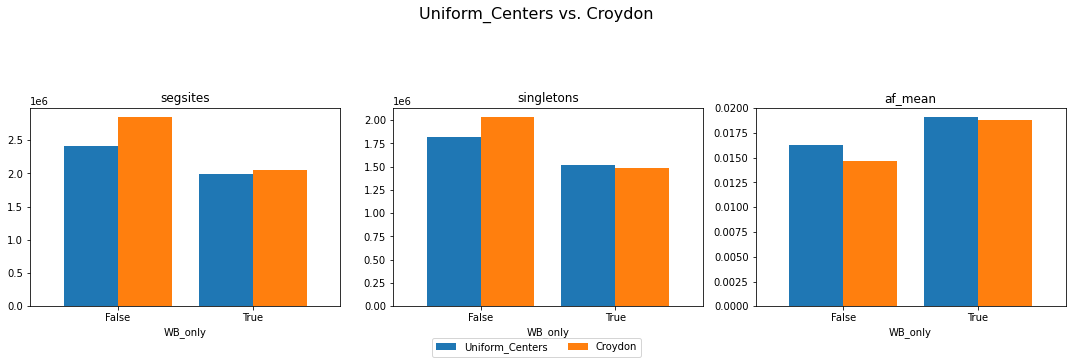

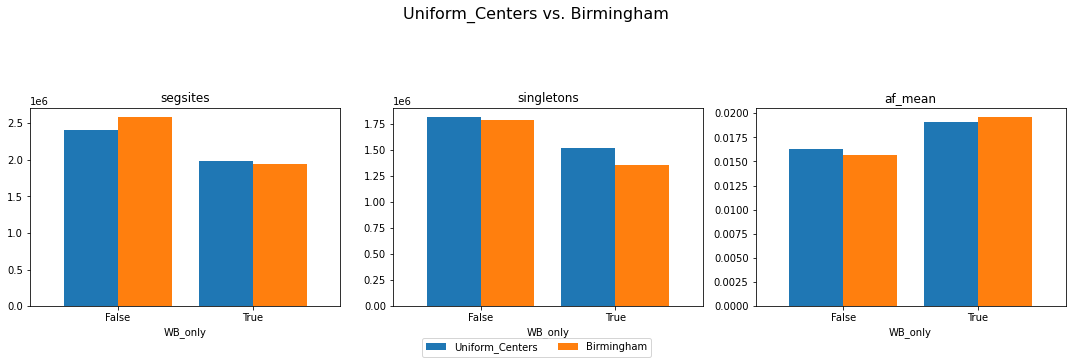

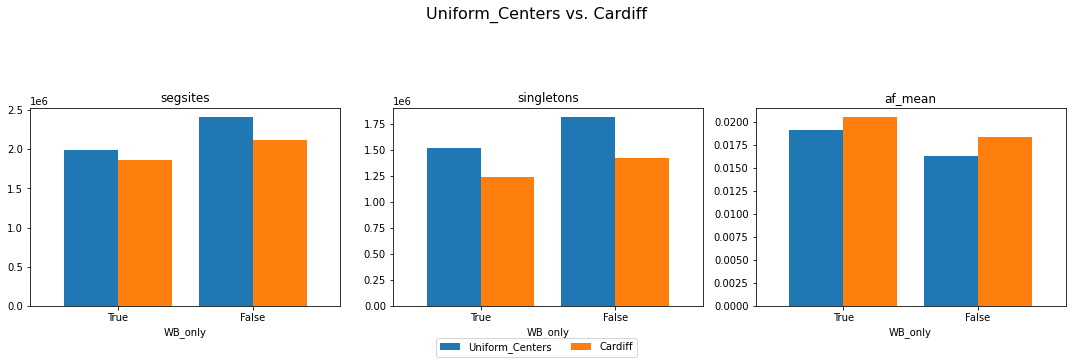

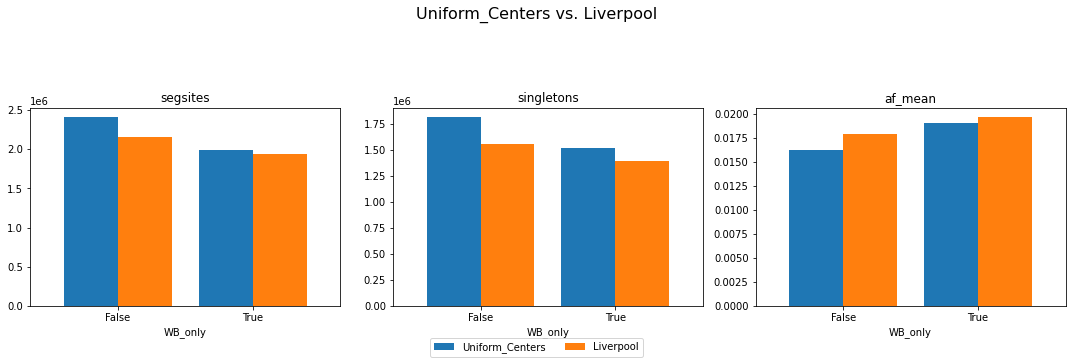

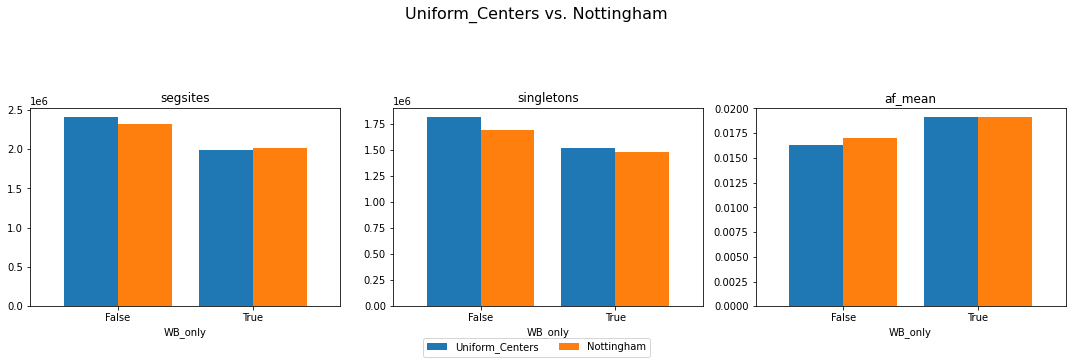

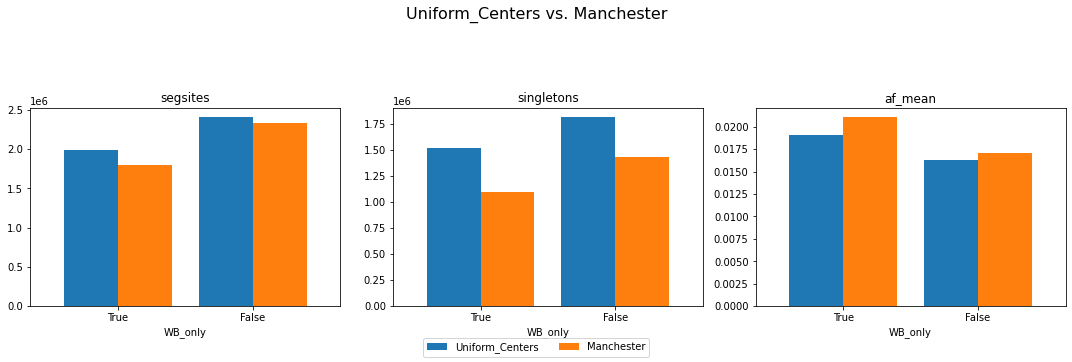

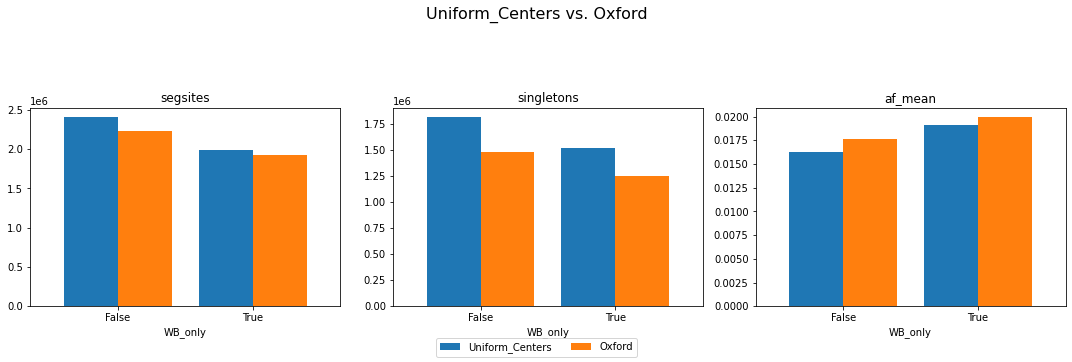

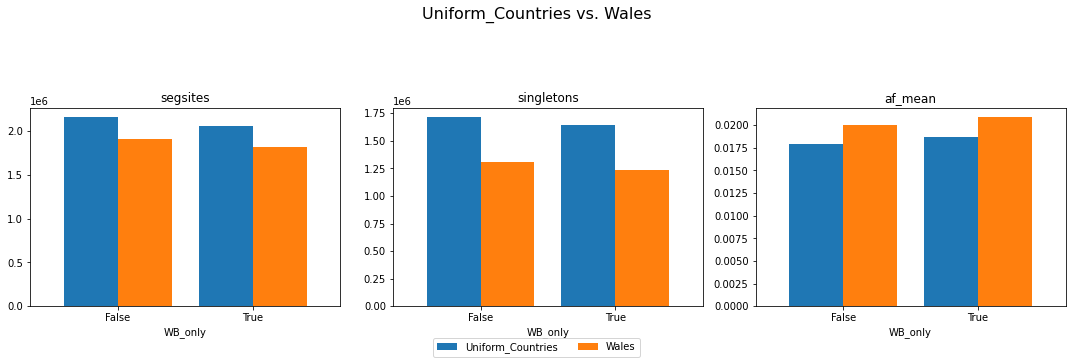

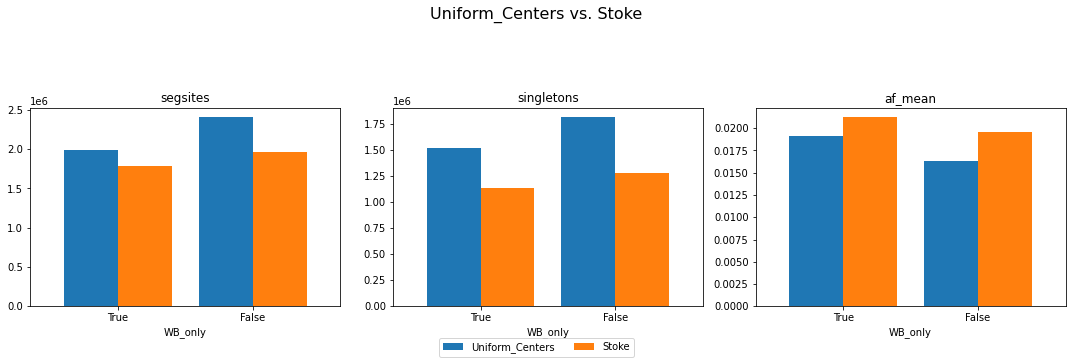

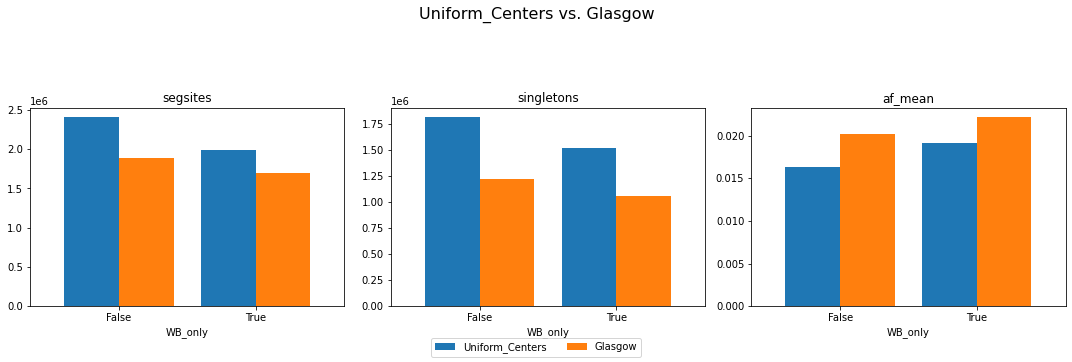

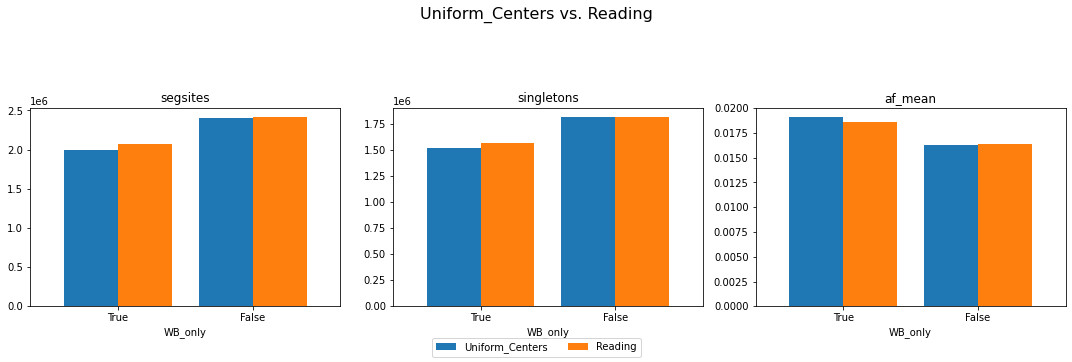

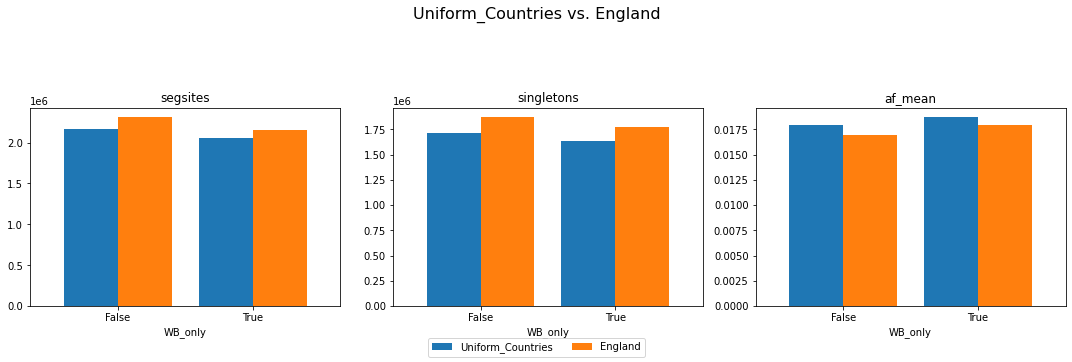

In [122]:
for pair in pairs:
    broad = pair[0]
    narrow = pair[1]
    
    sumstats_file = pd.read_csv([f for f in files_sumstats if broad in f and narrow in f][0],sep='\t')
    
    df_plot = sumstats_file[["WB_only", "segsites_"+broad, "segsites_"+narrow, 
              "singletons_"+broad, "singletons_"+narrow,
              "af_mean_"+broad, "af_mean_"+narrow]]

    # Set the index to "WB_only" for grouping
    df_plot.set_index("WB_only", inplace=True)

    # Create subplots in a single row
    fig, axes = plt.subplots(ncols=3, figsize=(15, 5), sharey=False)
    fig.suptitle(broad+" vs. "+narrow,fontsize=16)

    # Plotting for each category
    df_plot[['segsites_'+broad, 'segsites_'+narrow]].plot(kind='bar', ax=axes[0], width=0.8, rot=0,legend=False)
    axes[0].set_title('segsites')

    df_plot[['singletons_'+broad, 'singletons_'+narrow]].plot(kind='bar', ax=axes[1], width=0.8, rot=0,legend=False)
    axes[1].set_title('singletons')

    df_plot[['af_mean_'+broad, 'af_mean_'+narrow]].plot(kind='bar', ax=axes[2], width=0.8, rot=0,legend=False)
    axes[2].set_title('af_mean')

    # Add a common legend below the subplots
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, loc='lower center', ncol=3, labels=[broad,narrow])

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.85])

    # Show the plot
    plt.savefig('../figures/subsampling/sumstats/'+broad+'.'+narrow+'.pdf')


